In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# EDA

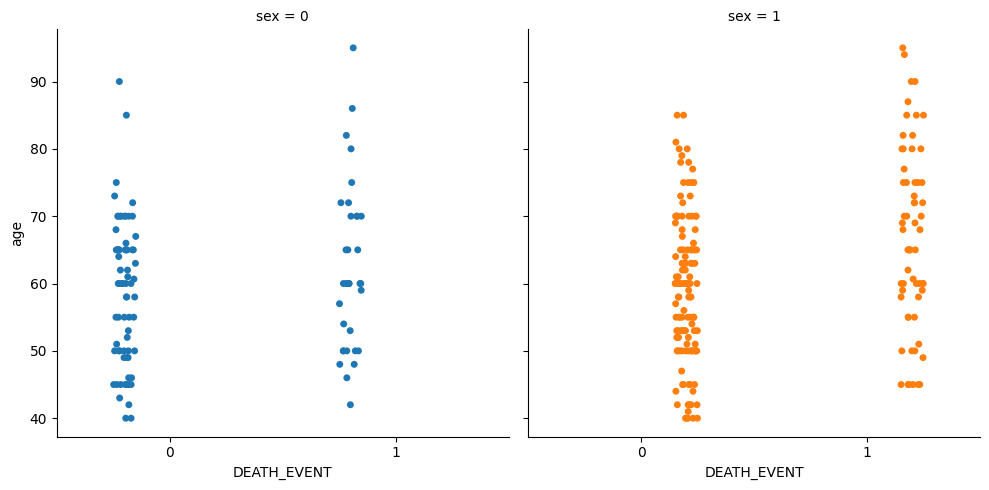

In [6]:
# sns.relplot(data=df,x="age",y="DEATH_EVENT",col="sex",kind="line")
# sns.histplot(data=df,x="age",y="DEATH_EVENT",hue="sex")
# sns.catplot(data=df,x="age",y="DEATH_EVENT",col="sex",kind="bar")
# sns.scatterplot(data=df,x="age",y="DEATH_EVENT",hue="sex",col="sex")   try to split by sex
# sns.stripplot(data=df,x="DEATH_EVENT",y="age",hue="sex",dodge=True)
sns.catplot(data=df,x="DEATH_EVENT",y="age",hue="sex",col="sex",dodge=True)

**smoking vs death event relation**

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

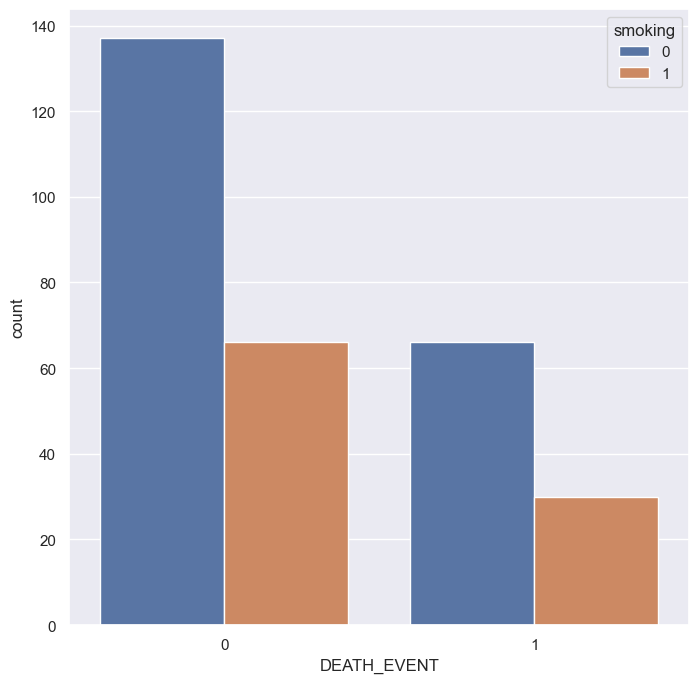

In [9]:
sns.set(rc={"figure.figsize":(8,8)})
sns.countplot(data=df,x=df['DEATH_EVENT'],hue="smoking")

**smoking vs death event relation by sex**

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

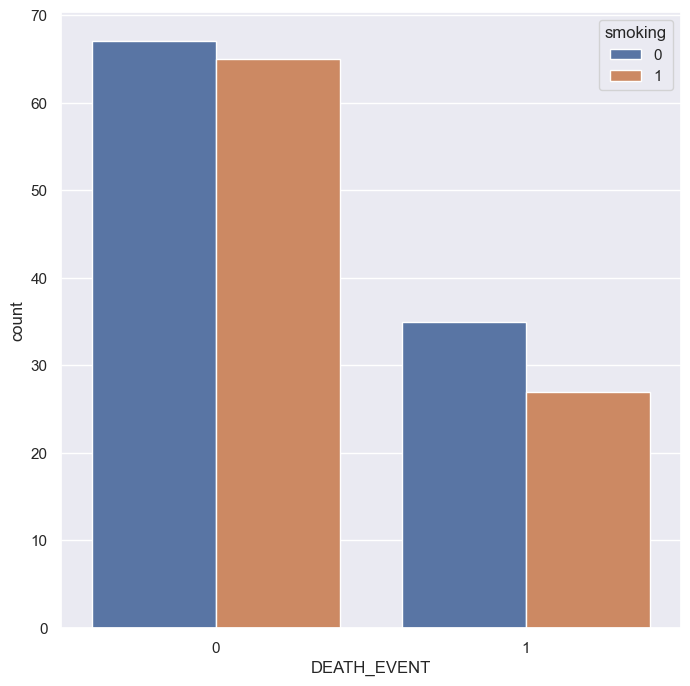

In [57]:
checkmale=df[((df['DEATH_EVENT']==1) |(df['DEATH_EVENT']==0)) & (df['sex']==1)]
checkmale
sns.set(rc={"figure.figsize":(8,8)})
sns.countplot(data=checkmale,x=checkmale['DEATH_EVENT'],hue="smoking")

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

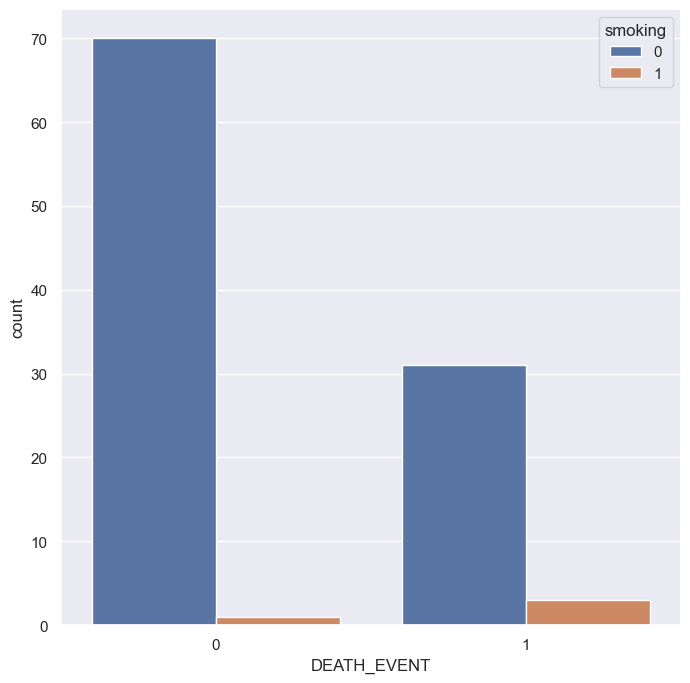

In [58]:
checkfemale=df[((df['DEATH_EVENT']==1) |(df['DEATH_EVENT']==0)) & (df['sex']==0)]
checkfemale
sns.set(rc={"figure.figsize":(8,8)})

sns.countplot(data=checkfemale,x=checkfemale['DEATH_EVENT'],hue="smoking")

**anaemia vs bp relation**

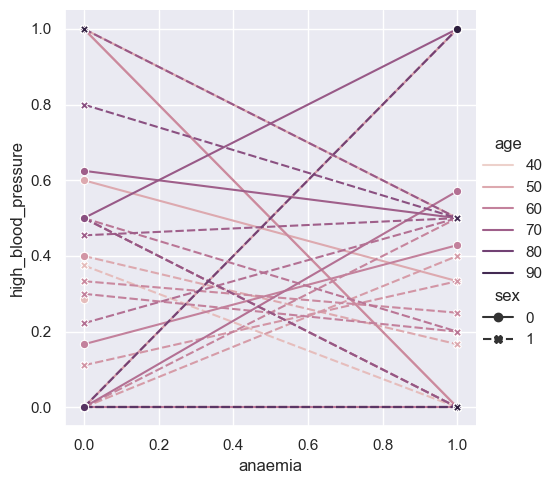

In [59]:
# sns.boxplot(data=df,x="anaemia",y="high_blood_pressure",hue="sex",col="sex",dodge=True)
# sns.lineplot(data=df,x="anaemia",y="high_blood_pressure",hue="sex",style="sex")
sns.set(rc={"figure.figsize":(8,8)})
sns.relplot(data=df,x="anaemia",y="high_blood_pressure",hue="age",
            style="sex",kind="line",errorbar=None,markers=True
           )
# sns.boxplot(data=df,x="anaemia",y="high_blood_pressure",hue="sex")

# matplotlib scatterplot not working
# plt.scatter(x="anaemia",y="high_blood_pressure",c="blue")
# plt.show()

**diabetes vs creatinine**

<Axes: xlabel='anaemia', ylabel='serum_creatinine'>

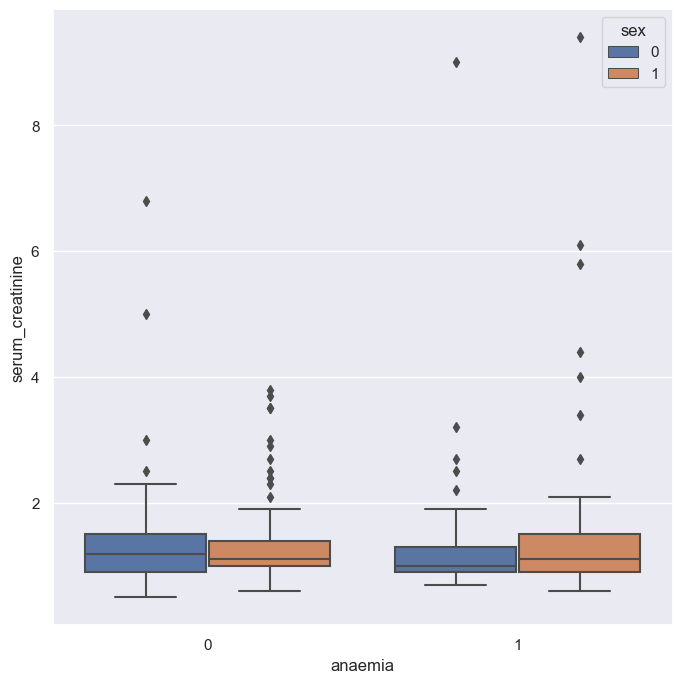

In [10]:
# sns.relplot(data=df,x="anaemia",y="serum_creatinine",hue="sex",
#             style="sex",kind="line",errorbar=None,markers=True
#            )
# sns.relplot(data=df,x="anaemia",y="serum_creatinine",hue="age",
#             style="sex",kind="line",errorbar=None,markers=True
#            )
sns.set(rc={"figure.figsize":(8,8)})
sns.boxplot(data=df,x="anaemia",y="serum_creatinine",hue="sex")

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='platelets'>

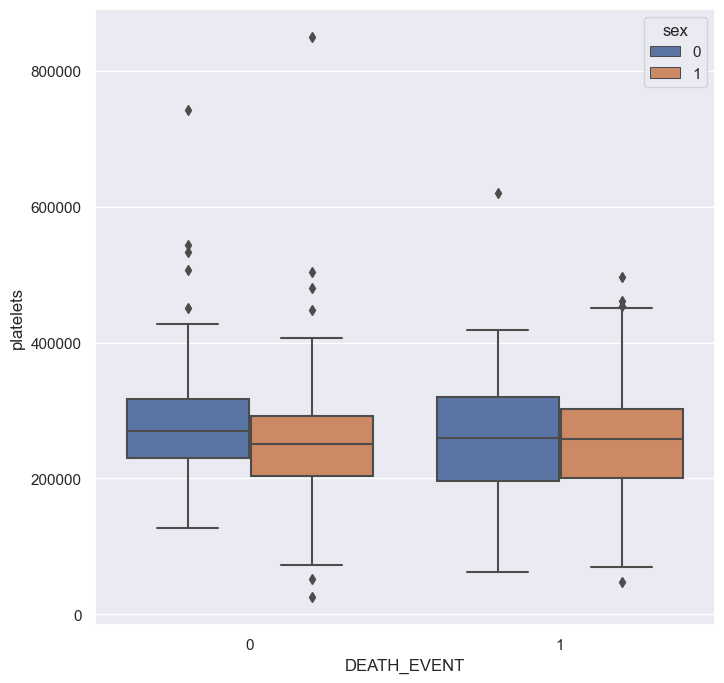

In [60]:
sns.set(rc={"figure.figsize":(8,8)})
sns.boxplot(data=df,y="platelets",x="DEATH_EVENT",hue="sex")

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='serum_sodium'>

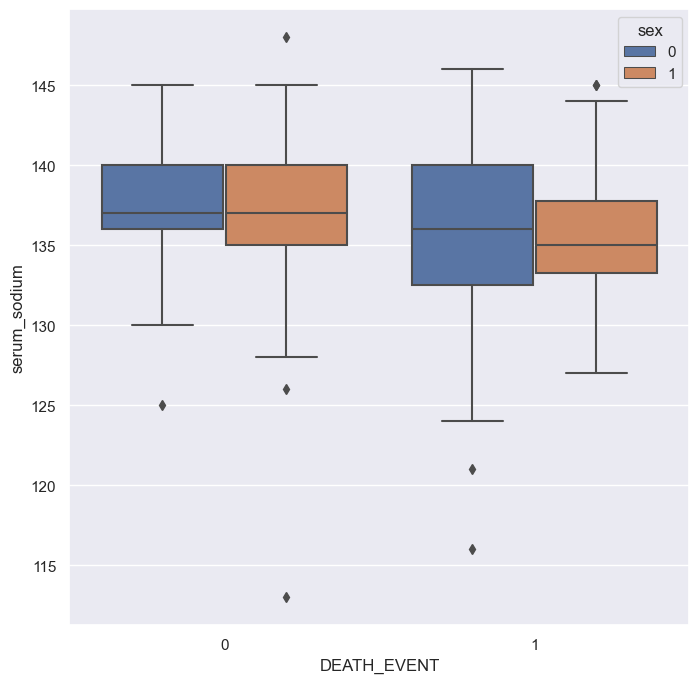

In [61]:
sns.set(rc={"figure.figsize":(8,8)})
sns.boxplot(data=df,y="serum_sodium",x="DEATH_EVENT",hue="sex")

# Introduction to ML

In [11]:
x=df.drop(['DEATH_EVENT'],axis=1)
x.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6


In [12]:
y=df['DEATH_EVENT']
y.head(2)

0    1
1    1
Name: DEATH_EVENT, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodel=LogisticRegression()

In [18]:
logmodel.fit(x_train,y_train)

C:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
logmodel.score(x,y)

0.822742474916388

In [20]:
df.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [21]:
logmodel.predict([[62,0,61,1,38,1,155000,1.1,143,1,1,270]])

C:\Users\sayan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x,y,cv=5)

array([0.56666667, 0.95      , 0.86666667, 0.86666667, 0.6779661 ])

In [26]:
from sklearn.svm import SVC
cross_val_score(SVC(gamma='auto'),x,y,cv=5)

array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ])

In [27]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=5)

array([0.48333333, 0.8       , 0.83333333, 0.7       , 0.6779661 ])

In [28]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),x,y, cv=10)
np.average(scores1)

0.7222988505747127

In [29]:
scores2 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x,y, cv=10)
np.average(scores2)

0.8022988505747126

In [30]:
scores2 = cross_val_score(SVC(gamma='auto'),x,y, cv=10)
np.average(scores2)

0.6789655172413793

Conclusion:- Here I conclude that after being analysing the data thoroughly by plotting different types of graphs we proceed towards ML model where we made an model which can predict the death events of an individual on the basis of certain inputs such as age, blood & sugar level etc.
Final Algorithm :- LogisticRegression
Accuracy:- 